# optimization algorithm using CNN for MNIST 
- CNN model is compiled using Adagrad optimization


In [73]:
from keras.datasets import mnist 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization 
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical 

In [74]:
batch_size=250
epochs=5
no_classes=10
validation_split=0.2
verbose=1

#load KMNIST dataset
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
# print(xtrain)
xtrain.shape, xtest.shape


((60000, 28, 28), (10000, 28, 28))

In [75]:
# convert target variables to multiclass classification
ytrain_norm=to_categorical(ytrain)
ytrain_norm
ytest_norm=to_categorical(ytest)
ytest_norm

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [76]:
#keras input shape
input_shape=(xtrain.shape[1],xtrain.shape[2],1)
#reshape
xtrain=xtrain.reshape(xtrain.shape[0],xtrain.shape[1],xtrain.shape[2],1)
xtest=xtest.reshape(xtest.shape[0],xtest.shape[1],xtest.shape[2],1)
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

In [77]:
#normalize the data
xtrain=xtrain/255.
xtest=xtest/255.


# creating the model

In [78]:
model=Sequential([
    Conv2D(32,kernel_size=(3,3),activation='relu', input_shape=input_shape),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),
    Flatten(),
    Dense(256,activation='relu'),
    BatchNormalization(),
    Dense(10,activation='softmax')
])



In [80]:
# Adagrad optimizer
model.compile(loss='categorical_crossentropy',optimizer=tf.optimizers.Adagrad(
    learning_rate=0.001,
    initial_accumulator_value=0.1,
    epsilon=1e-07
),metrics=['accuracy'])

In [97]:
# Adadelta optimizer
model.compile(loss='categorical_crossentropy',optimizer=tf.optimizers.Adadelta(
    learning_rate=0.001,
    rho=0.95,
    epsilon=1e-07,
    name='Adadelta'
),metrics=['accuracy'])

In [87]:
# Adam-adaptive optimizer
model.compile(loss='categorical_crossentropy',optimizer=tf.optimizers.Adam(
    learning_rate=0.001), metrics=['accuracy'])

In [99]:
#adabound optimizer
from torch_optimizer import AdaBound
model.compile(loss='categorical_crossentropy',optimizer=AdaBound(
   lr=1e-3, final_lr=0.1
))

In [98]:
# fit data to model
history = model.fit(xtrain,ytrain_norm,batch_size=250,epochs=5,verbose=1,validation_split=0.2)

Epoch 1/5
192/192 [==============================] - 2s 9ms/step - loss: 0.0043 - accuracy: 0.9988 - val_loss: 0.0349 - val_accuracy: 0.9899
Epoch 2/5
192/192 [==============================] - 1s 6ms/step - loss: 0.0041 - accuracy: 0.9990 - val_loss: 0.0347 - val_accuracy: 0.9899
Epoch 3/5
192/192 [==============================] - 1s 7ms/step - loss: 0.0039 - accuracy: 0.9991 - val_loss: 0.0345 - val_accuracy: 0.9901
Epoch 4/5
192/192 [==============================] - 1s 6ms/step - loss: 0.0038 - accuracy: 0.9992 - val_loss: 0.0344 - val_accuracy: 0.9900
Epoch 5/5
192/192 [==============================] - 1s 6ms/step - loss: 0.0037 - accuracy: 0.9993 - val_loss: 0.0342 - val_accuracy: 0.9900


# generate generalization metrics

In [82]:
score = model.evaluate(xtest,ytest_norm,verbose=0)
score
# print(f'Test loss using Adagrad: {score[0]} / Test accuracy: {score[1]}')

[0.1225113645195961, 0.9660000205039978]

# study the performance of the optimizer with respect to cross entropy loss function. a graph was plotted

In [100]:
import matplotlib.pyplot as plt
x=[1,2,3,4,5]

loss1=[0.6856,0.2555,0.1913,0.1586,0.1384]
accuracy1=[0.7947,0.9301,0.9481,0.9571,0.9626]
loss2=[0.0043,0.0041,0.0039,0.0038,0.0037]
accuracy2=[0.9988,0.9990,0.9991,0.9992,0.9993]
loss3=[0.0665,0.0233,0.0120,0.0057,0.0043]
accuracy3=[0.9799,0.9926,0.9966,0.9986,0.9989]
loss4=[0.1139,0.0281,0.0153,0.009,0.006]
accuracy4=[0.9646,0.992,0.9963,0.9984,0.992]

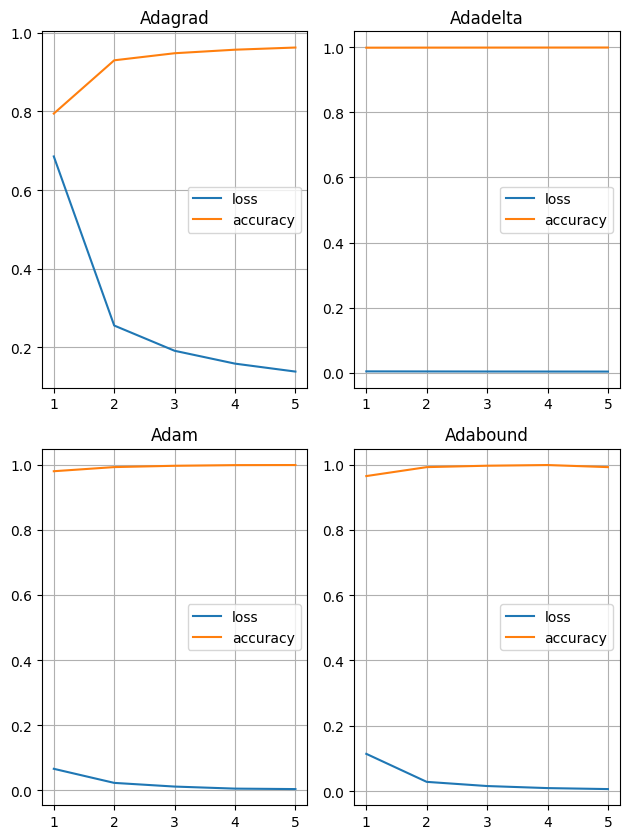

In [101]:
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(6.4,8.5))

#adgrad
axs[0,0].plot(x,loss1,label='loss')
axs[0,0].plot(x,accuracy1,label='accuracy')
axs[0,0].legend()
axs[0,0].grid()
axs[0,0].set(title='Adagrad')
#adadelta
axs[0,1].plot(x,loss2,label='loss')
axs[0,1].plot(x,accuracy2,label='accuracy')
axs[0,1].legend()
axs[0,1].grid()
axs[0,1].set(title='Adadelta')
#adam
axs[1,0].plot(x,loss3,label='loss')
axs[1,0].plot(x,accuracy3,label='accuracy')
axs[1,0].legend()
axs[1,0].grid()
axs[1,0].set(title='Adam')
#adabound
axs[1,1].plot(x,loss4,label='loss')
axs[1,1].plot(x,accuracy4,label='accuracy')
axs[1,1].legend()
axs[1,1].grid()
axs[1,1].set(title='Adabound')

fig.tight_layout()
plt.show()